# KELOMPOK 10

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv('Train.csv')

Saving Train.csv to Train (1).csv


# **1. Data Cleansing (50 poin)**

Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti: <br>
A. Handle missing values <br>
B. Handle duplicated data <br>
C. Handle outliers <br>
D. Feature transformation <br>
E. Feature encoding <br>
F. Handle class imbalance <br>
Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan. <br>
<br>
Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature 
encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena 
akan fokus menggunakan model yang robust terhadap outlier”).

# A. Handle Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
# Pengelompokan kolom berdasarkan jenisnya
cat = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
num = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
num_cat = ['Reached.on.Time_Y.N']

In [ ]:
# Ringkasan statistik dari kolom numerik
df[num].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [ ]:
# Categorical kolom
df[cat].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


## - Pada Handle Missing Values tidak ada yang perlu di handle karena tidak ada data yang kosong, data terbilang lengkap.

# B. Handle Duplicate Data

In [ ]:
# Cek jumlah duplikat row dari semua kolom
df.duplicated().sum()

0

## - Pada Handle Duplicate Data, tidak perlu melakukan pengghapusas atau memanipulasi data karena data yang duplikat pada dataset tidak ada



# C. Handle Outliers

In [ ]:
from scipy import stats

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Customer_care_calls', 'Prior_purchases']:
  zscore = abs(stats.zscore(df[col]))
  filtered_entries = (zscore < 3) & filtered_entries

df1 = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 10821


## - Pada Handle Outliers kita perlu menghilangkan ourtlier yang extrime pada kolom Prior Purchases, dari jumlah baris awal 10999 setelah difilter menjadi 10821 baris

# D. Feature transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# StandardScaler transformation
df1['std_Prior_purchases'] = StandardScaler().fit_transform(df1['Prior_purchases'].values.reshape(len(df1), 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# MinMaxScaler transformation
df1['norm_Customer_care_calls'] = MinMaxScaler().fit_transform(df1['Customer_care_calls'].values.reshape(len(df1), 1))
df1['norm_Cost_of_the_Product'] = MinMaxScaler().fit_transform(df1['Cost_of_the_Product'].values.reshape(len(df1), 1))
df1['norm_Weight_in_gms'] = MinMaxScaler().fit_transform(df1['Weight_in_gms'].values.reshape(len(df1), 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
std_num = ['std_Prior_purchases', 'norm_Customer_care_calls', 'norm_Cost_of_the_Product', 'norm_Weight_in_gms']

In [ ]:
# log transformation
# df['log_Cost_of_the_Product'] = np.log(df['Cost_of_the_Product'])
# df['log_Discount_offered'] = np.log(df['Discount_offered'])
# df['log_Weight_in_gms'] = np.log(df['Weight_in_gms'])

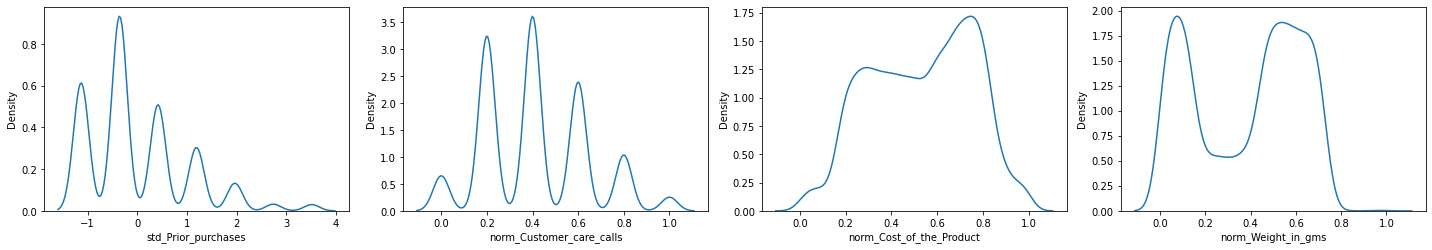

In [ ]:
plt.figure(figsize = (20, 10))
for i in range(0, len(std_num)):
  plt.subplot(3, len(std_num), i+1)
  sns.kdeplot(df1[std_num[i]])
  plt.tight_layout()

In [ ]:
# df1 = df1.drop(columns=['Cost_of_the_Product', 'Customer_care_calls', 'Weight_in_gms', 'Prior_purchases'])

## Cara 2 menggunakan function normalizer

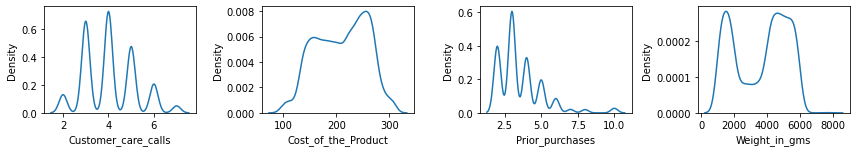

In [ ]:
num = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Weight_in_gms']
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df[num], x=df[column])
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


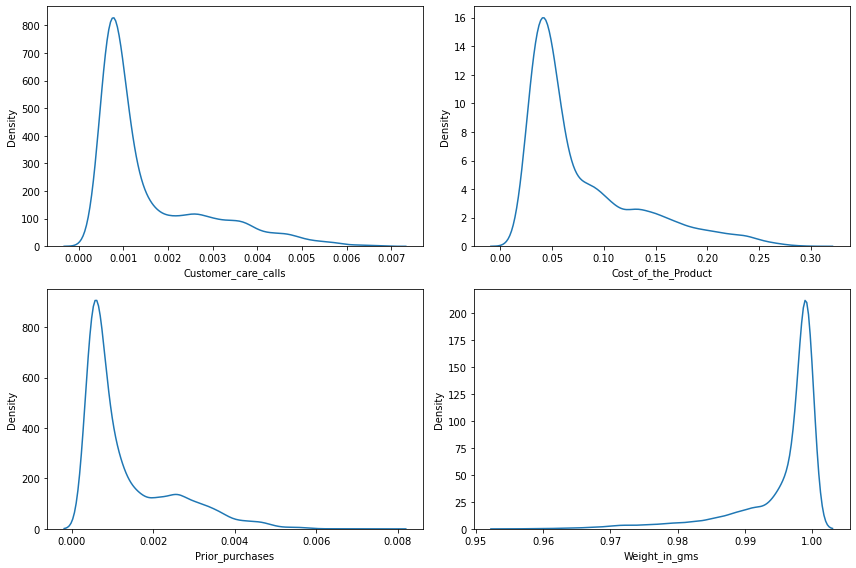

In [ ]:
from sklearn.preprocessing import Normalizer
num = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Weight_in_gms']
features = df1[num]

scaler = Normalizer(norm = 'l2')
# norm = 'l2' is default

df1[num] = scaler.fit_transform(features.values)

plt.figure(figsize=(12,8))

for i, column in enumerate (df1[num].columns, 1):
    plt.subplot(2,2,i)
    sns.kdeplot(data=df1, x=df1[column])
    plt.tight_layout()

## -Pada Feature transformation, ada beberapa feature yang diHandle yaitu Prior purchases menjadi nilai standardization dan feature Customer care calls, Cost of the product, dan Weight in gms menjadi nilai normalization. setelah mendapatkan feature baru, feature nilai asli akan di drop

# E. Feature Encoding

In [ ]:
# Label Encoding
mapping_Product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

mapping_Gender = {
    'F' : 0,
    'M' : 1
}

mapping_Discount_offered = {
    '25%' : [int(x) for x in np.linspace(1,25,25)],
    '50%' : [int(x) for x in np.linspace(26,50,25)],
    '75%' : [int(x) for x in np.linspace(51,75,25)]
}
df1['Product_importance'] = df1['Product_importance'].map(mapping_Product_importance)
df1['Gender'] = df1['Gender'].map(mapping_Gender)
df1['Discount_offered'] = df1['Discount_offered'].map(mapping_Discount_offered)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
# One Hot Encoder
for cat in ['Mode_of_Shipment', 'Warehouse_block']:
    onehots = pd.get_dummies(df1[cat], prefix=cat)
    df1 = df1.join(onehots)

In [ ]:
# drop kolom yang di encoding menggunakan OHE : 'Mode_of_Shipment' & 'Warehouse_block'
df1 = df1.drop(columns=['Mode_of_Shipment', 'Warehouse_block'])

In [ ]:
df1 = df1.drop(columns=['ID'])

## Pada Feature Encoding, ada beberapa feature yang akan dilabel encoding dan one hot endcoder diantaranya adalah, feature gender, Discount offered dan Product importence akan dilabel encoding dengan metode mapping, lalu untuk feature mode of shipment dan warehouse block akan di one hot encoder. Ada pula yang tidak perlu di lakukan feature encoding seperti feature Customer rating.<br>
## Setelah itu kolom nilai asli yang sudah di one hot encoder akan di drop 

# F. Handle class imbalance

In [ ]:
df1['Reached.on.Time_Y.N'].value_counts()

1    6461
0    4360
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
df1['Reached.on.Time_class'] = df1['Reached.on.Time_Y.N'] > 0.8
print(df1['Reached.on.Time_class'].value_counts())

True     6461
False    4360
Name: Reached.on.Time_class, dtype: int64


In [ ]:
X = df1[[col for col in df1.columns if col not in['Reached.on.Time_class', 'Reached.on.Time_Y.N']]].values
y = df1['Reached.on.Time_class'].values
print(X.shape)
print(y.shape)

(10821, 16)
(10821,)


In [ ]:
from imblearn import under_sampling, over_sampling

X_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X, y)
print(pd.Series(y_over).value_counts())

True     6461
False    6461
dtype: int64


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


## Pada handle class imbalance, metode yang digunakan adalah oversampling

# Train_test_split

In [ ]:
X = df1.drop(columns=['Reached.on.Time_Y.N'])
y = df1['Reached.on.Time_Y.N']

In [ ]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 2. Feature Engineering (35 poin)

## Cek feature yang ada sekarang, lalu lakukan:
A. Feature selection (membuang feature yang kurang relevan atau redundan) <br>
B. Feature extraction (membuat feature baru dari feature yang sudah ada) <br>
C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang 
mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya 
ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya 
dan tidak perlu diimplementasikan) <br>
<br>
Untuk 2A & 2B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature 
digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)

## A. Feature selection (membuang feature yang kurang relevan atau redundan) <br>
- ada beberapa feature yang dibuang yaitu ID karena menurut logika kami ID tidak akan mempengaruhi apakah barang telat atau tidak, lalu Nilai asli dari Discount_offered, Mode_of_Shipment, Warehouse_block, Cost_of_the_Product, Weight_in_gms karena sudah dilakukan transformation dll

## B. Feature extraction (membuat feature baru dari feature yang sudah ada) <br>
- pada feature Prior_purchases, Customer_care_calls, Cost_of_the_Product dan Weight_in_gms dilakukan feature transformation, sehingga menghasilkan feature baru berupa nilai-nilai standardization dan normalization <br>
<br>
- pada feature Mode_of_Shipment dan Warehouse_block dilakukan feature encoding, sehingga menghasilkan feature baru berupa nilai '0' dan '1'

## C. Tuliskan minimal 4 feature tambahan <br>
- Lokasi Customer (Bila direalisasikan bisa berdasarkan warehouse block)<br>
- Perhitungan berapa hari telatnya berdasarkan estimasi yang sudah ditentukan<br>
- Jenis pengiriman (ex :kilat, reguler)<br>
- Jasa pengiriman<br>
- Tanggal pengiriman<br>
- Cuaca